<a href="https://colab.research.google.com/github/cshah13/healthy-food-priorities-baltimore/blob/main/Geospatial_Analysis_HFAI_MedHHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Libraries





In [ ]:
# install geopandas
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:

# download libraries to  use in google colab

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal
 
# Install rtree - Geopandas requirment
!apt install python3-rtree

# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git

# Install descartes - Geopandas requirment
!pip install descartes 

# Install Folium for Geographic data visualization
!pip install folium

# Install mapclassify for geospatial data viz
!pip install mapclassify

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-mn8ylt1w
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-mn8ylt1w


## Import Libraries for Data Analysis 

In [ ]:
# import libraries for data analysis
import pandas as pd

# for geo analysis
import geopandas as gpd
import mapclassify

# for data viz
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# to export files
from google.colab import files

## Import Data 
Average Healthy Food Availability Index:https://data.baltimorecity.gov/datasets/bniajfi::average-healthy-food-availability-index?geometry=-77.115%2C39.192%2C-76.126%2C39.378

Median Household Income:https://data.baltimorecity.gov/datasets/bniajfi::median-household-income-community-statistical-area?geometry=-77.620%2C39.130%2C-75.642%2C39.501&selectedAttribute=mhhi19

Grocery Store Locations in Baltimore City: https://data.baltimorecity.gov/datasets/grocery-store?geometry=-76.870%2C39.262%2C-76.376%2C39.355

Fast Food Outlet Density per 1000 Residents: https://data.baltimorecity.gov/datasets/bniajfi::fast-food-outlet-density-per-1000-residents



In [ ]:
# import data 

df_grocery=pd.read_csv("https://raw.githubusercontent.com/apate139/Final-Project-Colab/main/Grocery_Store.csv")
df_grocery.head()
df_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           45 non-null     float64
 1   Y           45 non-null     float64
 2   fid         45 non-null     int64  
 3   xobjectid   45 non-null     int64  
 4   xloc_name   45 non-null     object 
 5   xst_ref_id  45 non-null     int64  
 6   gis_id      45 non-null     object 
 7   srcid_t     45 non-null     object 
 8   srcid_i     45 non-null     int64  
 9   edit_date   45 non-null     object 
 10  ftype       45 non-null     int64  
 11  subtype     45 non-null     object 
 12  loc_type    45 non-null     object 
 13  loc_meth    45 non-null     object 
 14  gc_status   45 non-null     object 
 15  gc_score    45 non-null     int64  
 16  street_tag  45 non-null     object 
 17  prcl_pin    45 non-null     object 
 18  address     45 non-null     object 
 19  city        45 non-null     obj

In [ ]:
# import geospatial data
gdf_grocery=gpd.read_file("Grocery_Store.shp")
gdf_grocery.head()
gdf_grocery.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         45 non-null     int64   
 1   xobjectid   45 non-null     int64   
 2   xloc_name   0 non-null      object  
 3   xst_ref_id  45 non-null     int64   
 4   gis_id      0 non-null      object  
 5   srcid_t     0 non-null      object  
 6   srcid_i     45 non-null     int64   
 7   edit_date   45 non-null     object  
 8   ftype       45 non-null     int64   
 9   subtype     36 non-null     object  
 10  loc_type    0 non-null      object  
 11  loc_meth    0 non-null      object  
 12  gc_status   0 non-null      object  
 13  gc_score    45 non-null     int64   
 14  street_tag  0 non-null      object  
 15  prcl_pin    0 non-null      object  
 16  address     45 non-null     object  
 17  city        45 non-null     object  
 18  state       45 non-null     object  
 19  zi

In [ ]:
# Import data 
df_med_hhi=pd.read_csv("https://raw.githubusercontent.com/apate139/Final-Project-Colab/main/Median_Household_Income.csv")
df_med_hhi.head()
df_med_hhi.info()

df_hfai=pd.read_csv("https://raw.githubusercontent.com/apate139/Final-Project-Colab/main/Average_Healthy_Food_Availability_Index-4.csv")
df_hfai.head()
df_hfai.info()

# Import geospatial data 
gdf_med_hhi=gpd.read_file("Median_Household_Income.shp")
gdf_med_hhi.head()


gdf_hfai=gpd.read_file("Average_Healthy_Food_Availability_Index.shp")
gdf_hfai.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       55 non-null     int64  
 1   CSA2010        55 non-null     object 
 2   mhhi10         55 non-null     float64
 3   mhhi11         55 non-null     float64
 4   mhhi12         55 non-null     float64
 5   mhhi13         55 non-null     float64
 6   mhhi14         55 non-null     float64
 7   mhhi15         55 non-null     float64
 8   mhhi16         55 non-null     float64
 9   mhhi17         55 non-null     float64
 10  mhhi18         55 non-null     float64
 11  mhhi19         55 non-null     float64
 12  Shape__Area    55 non-null     float64
 13  Shape__Length  55 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column        Non-Null 

,FID,CSA2010,CSA2010_1,hfai12,hfai15,SHAPE_Leng,SHAPE_Area,geometry
0,1,Allendale/Irvington/S. Hilton,Allendale/Irvington/S. Hilton,7.750000,7.526316,38770.165571,6.377046e+07,"POLYGON ((1409361.428 586287.858, 1409360.989 ..."
1,2,Beechfield/Ten Hills/West Hills,Beechfield/Ten Hills/West Hills,15.583333,10.400000,37524.950533,4.788253e+07,"POLYGON ((1398704.271 595723.916, 1398744.322 ..."
2,3,Belair-Edison,Belair-Edison,10.326087,8.227273,31307.314843,4.495003e+07,"POLYGON ((1434651.402 604737.873, 1434694.129 ..."
3,4,Brooklyn/Curtis Bay/Hawkins Point,Brooklyn/Curtis Bay/Hawkins Point,8.588235,8.793103,150987.703639,1.760777e+08,"MULTIPOLYGON (((1428882.025 563357.742, 142900..."
4,5,Canton,Canton,16.900000,15.200000,23338.611948,1.540854e+07,"POLYGON ((1433652.911 589454.698, 1433658.798 ..."


In [ ]:
gdf_med_hhi=gpd.read_file("Median_Household_Income.shp")
gdf_med_hhi.head()


,OBJECTID,CSA2010,mhhi10,mhhi11,mhhi12,mhhi13,mhhi14,mhhi15,mhhi16,mhhi17,mhhi18,mhhi19,Shape__Are,Shape__Len,geometry
0,1,Allendale/Irvington/S. Hilton,33563.12,33504.324121,33177.658915,38129.073308,35958.253351,36701.906742,37302.171053,39495.628472,38535.562176,43019.75792,6.377046e+07,38770.165571,"POLYGON ((1409361.428 586287.858, 1409360.989 ..."
1,2,Beechfield/Ten Hills/West Hills,50780.92,50439.739513,50135.121622,49807.861765,52622.688525,51537.582075,53565.079698,57572.502747,58055.306613,55017.77971,4.788253e+07,37524.950533,"POLYGON ((1398704.271 595723.916, 1398744.322 ..."
2,3,Belair-Edison,42920.83,45149.372510,46743.281847,43903.901338,38905.924198,38173.968254,40482.359649,39624.482085,42633.619512,46703.93468,4.495003e+07,31307.314843,"POLYGON ((1434651.402 604737.873, 1434694.129 ..."
3,4,Brooklyn/Curtis Bay/Hawkins Point,32888.50,33644.052189,33526.364650,34419.965251,35861.896552,36679.053435,38603.930233,40275.275330,39936.512500,39162.13858,1.760777e+08,150987.703639,"MULTIPOLYGON (((1428882.025 563357.742, 142900..."
4,5,Canton,74685.14,82129.569175,84978.141631,90862.712924,91735.652736,95362.400309,103281.832192,111891.251825,116911.088235,128460.48210,1.540854e+07,23338.611948,"POLYGON ((1433652.911 589454.698, 1433658.798 ..."


## Chloropleth Maps Using Geopandas

Text(0.5, 1.0, 'Healthy Food Availability Index Scores by Community Statistical Area, 2015')

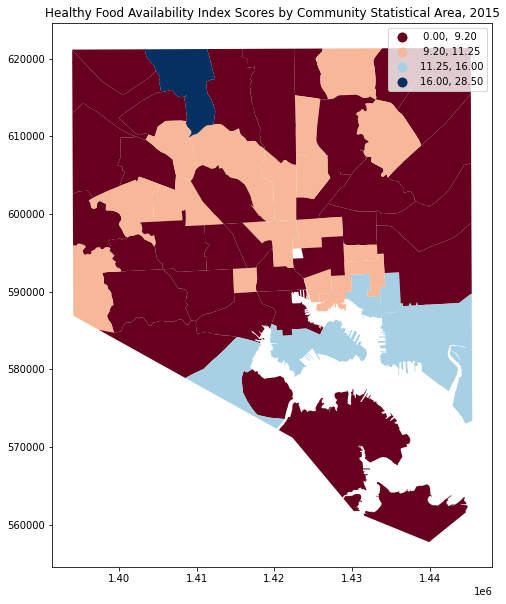

In [ ]:
# choropleth maps geopandas

# define the figure and the legend
fig, ax = plt.subplots(figsize= (50, 10))

# plot with gdf
gdf_hfai.plot(column = "hfai15",
                       ax = ax,
                       legend = True,
                       cmap = "RdBu",
                       scheme = "User_Defined",
                       classification_kwds = dict(bins = [9.2, 11.25, 16, 28.5]))

# add a title
plt.title("Healthy Food Availability Index Scores by Community Statistical Area, 2015")

Text(0.5, 1.0, 'Median Household Income by Community Statistical Area, 2015')

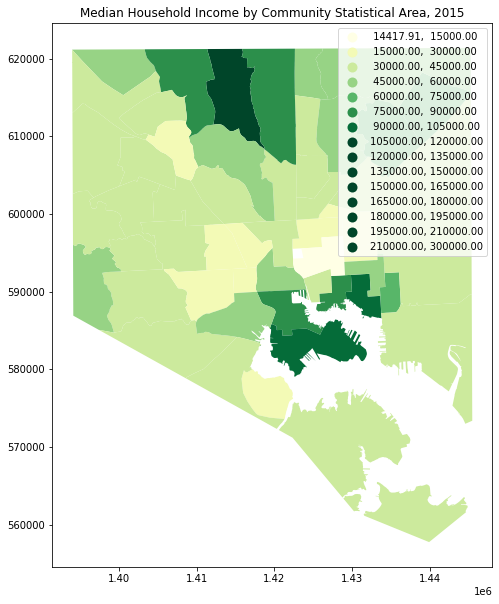

In [ ]:
fig, ax = plt.subplots(figsize= (50, 10))

# plot with gdf
med_hhi_map = gdf_med_hhi.plot(column = "mhhi15",
                       ax = ax,
                       legend = True,
                       cmap = "YlGn",
                       scheme = "User_Defined",
                       classification_kwds = dict(bins = [15000, 30000, 45000, 60000, 75000, 90000, 105000, 120000, 135000, 150000, 165000, 180000, 195000, 210000, 300000]))

# add a title
plt.title("Median Household Income by Community Statistical Area, 2015")

In [ ]:
df_food=pd.read_csv("https://raw.githubusercontent.com/apate139/Final-Project-Colab/main/Fast_Food_Outlet_Density_per_1%252C000_Residents.csv")
df_food.head()
df_food.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FID           55 non-null     int64  
 1   CSA2010       55 non-null     object 
 2   Fastfd11      55 non-null     float64
 3   Fastfd13      55 non-null     float64
 4   Fastfd18      55 non-null     float64
 5   SHAPE_Length  55 non-null     float64
 6   SHAPE_Area    55 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.1+ KB
